In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from nltk.corpus import stopwords
from math import log

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/most-liked-comments-on-youtube/youtube_dataset.csv


In [2]:
df = pd.read_csv('../input/most-liked-comments-on-youtube/youtube_dataset.csv')
df

,Video Name,Channel Name,Comment Id,User Name,Comment,Date,Likes
0,Luis Fonsi - Despacito ft. Daddy Yankee,LuisFonsiVEVO,UgwV0tapZzaFxdYm1z14AaABAg,GAMIT yuvraj,The people who liked this comment is officiall...,2020-08-10T20:00:43Z,98280
1,Luis Fonsi - Despacito ft. Daddy Yankee,LuisFonsiVEVO,UgyiccblP3A16aixpit4AaABAg,MrCrazy,"- Wait, it's 7B views\n- Always has been",2020-09-07T20:52:36Z,773
2,Luis Fonsi - Despacito ft. Daddy Yankee,LuisFonsiVEVO,Ugx7THW3EBNJlhJuwSB4AaABAg,60K Subs With 1 Video Challenge,*Teacher: What is the population of the Earth?...,2019-11-21T03:23:32Z,356081
3,Luis Fonsi - Despacito ft. Daddy Yankee,LuisFonsiVEVO,UgzXUsI6yrRjTKNASf94AaABAg,Srivathsa D,Let's be honest this wasn't your recommendatio...,2020-09-09T03:41:34Z,13
4,Luis Fonsi - Despacito ft. Daddy Yankee,LuisFonsiVEVO,UgxCu6mywg6uqjueHQ14AaABAg,1k Subscribers Challenge Without Any Video,Types Of People:\n10% Enjoying Song \n90% Chec...,2020-09-08T09:53:24Z,122
...,...,...,...,...,...,...,...
19295,ZAYN - PILLOWTALK (Official Music Video),ZaynVEVO,UgxqlnG8nQ36eDoXKbJ4AaABAg,KineZ,Claim your “before 1 billion” certificate here,2020-07-28T18:39:38Z,5087
19296,ZAYN - PILLOWTALK (Official Music Video),ZaynVEVO,UgwZsgM-0pn9tiFxmOh4AaABAg,varun raj,This means that you are before 1 billion views.,2020-09-09T11:41:30Z,6
19297,ZAYN - PILLOWTALK (Official Music Video),ZaynVEVO,UgxeBmhoyhSILM0HPux4AaABAg,hey harry,We won't have school till 2021 \nMay God help ...,2020-09-09T10:03:04Z,5
19298,ZAYN - PILLOWTALK (Official Music Video),ZaynVEVO,Ugy6KVBjdz7Rj2yxTER4AaABAg,Jannat EXO-L,Literally saw this song from 1M -> 996M,2020-09-08T19:41:18Z,4


In [3]:
! pip install langdetect

     |████████████████████████████████| 981 kB 896 kB/s 
  Created wheel for langdetect: filename=langdetect-1.0.8-py3-none-any.whl size=993190 sha256=0a12e46134edc7cc2c0593c6cb44be90abdb465ecf3ce74ea80b03b4ee7984a5
  Stored in directory: /root/.cache/pip/wheels/59/f6/9d/85068904dba861c0b9af74e286265a08da438748ee5ae56067
Successfully built langdetect


In [4]:
from langdetect import detect

In [5]:
arr_lang = []

for comment in df['Comment'].values:
    try:
        lang = detect(comment)
    except:
        lang = 'elf'
    arr_lang.append(lang)

In [6]:
df['lang'] = arr_lang
df.head()

,Video Name,Channel Name,Comment Id,User Name,Comment,Date,Likes,lang
0,Luis Fonsi - Despacito ft. Daddy Yankee,LuisFonsiVEVO,UgwV0tapZzaFxdYm1z14AaABAg,GAMIT yuvraj,The people who liked this comment is officiall...,2020-08-10T20:00:43Z,98280,en
1,Luis Fonsi - Despacito ft. Daddy Yankee,LuisFonsiVEVO,UgyiccblP3A16aixpit4AaABAg,MrCrazy,"- Wait, it's 7B views\n- Always has been",2020-09-07T20:52:36Z,773,en
2,Luis Fonsi - Despacito ft. Daddy Yankee,LuisFonsiVEVO,Ugx7THW3EBNJlhJuwSB4AaABAg,60K Subs With 1 Video Challenge,*Teacher: What is the population of the Earth?...,2019-11-21T03:23:32Z,356081,en
3,Luis Fonsi - Despacito ft. Daddy Yankee,LuisFonsiVEVO,UgzXUsI6yrRjTKNASf94AaABAg,Srivathsa D,Let's be honest this wasn't your recommendatio...,2020-09-09T03:41:34Z,13,en
4,Luis Fonsi - Despacito ft. Daddy Yankee,LuisFonsiVEVO,UgxCu6mywg6uqjueHQ14AaABAg,1k Subscribers Challenge Without Any Video,Types Of People:\n10% Enjoying Song \n90% Chec...,2020-09-08T09:53:24Z,122,en


In [7]:
df = df.sample(frac = 1)
df.reset_index(drop=True, inplace=True)
df.head()

,Video Name,Channel Name,Comment Id,User Name,Comment,Date,Likes,lang
0,"Shawn Mendes, Camila Cabello - Señorita",ShawnMendesVEVO,UgwpZ5rb48Q5UJGuJ9F4AaABAg,Pro Gamer,Don't worry your not the only one listening th...,2020-09-06T16:37:11Z,80,en
1,22. Hasta el Amanecer - Nicky Jam | Video Oficial,NickyJamTV,UgzIH5WZFTiywFVR9lR4AaABAg,Noah Vincenzo,السلام عليكم السلام و رحمة للعالمين. . . 😂😂😂😂😂,2020-08-27T12:33:09Z,4,ar
2,David Guetta - Hey Mama (Official Video) ft Ni...,David Guetta,UgwRwhiW7U-Rmr3xBkR4AaABAg,Immortal Dragon,"“I don’t cook, I don’t clean”\n*My mom screami...",2020-09-09T04:11:52Z,0,en
3,Naughty Boy - La la la ft. Sam Smith (Official...,NaughtyBoyVEVO,Ugx-4R-oPbL-Toadywt4AaABAg,2listen,I'm covering my ears like a kid\r\nWhen your w...,2020-09-06T09:50:44Z,1,en
4,Jennifer Lopez - On The Floor ft. Pitbull,JenniferLopezVEVO,UgwiejUCtaSJZEtzxrR4AaABAg,"100,000 subs with no video challenge",2011-\nCorona: Beer\nTrump: A reality show\nKa...,2020-08-25T06:30:14Z,579,en


In [8]:
def cleaner(x):
    x = x.lower()
    x = x.split(' ')
    
    for i, word in enumerate(x):
        cword = []
        for ch in word:
            if ch.isalpha():
                cword.append(ch)
                
        x[i] = ''.join(cword)
    
    x = [word for word in x if word != '' and not word in set(stopwords.words('english'))]
    return x

In [9]:
df['Comment'] = df['Comment'].apply(cleaner)
df['Comment'] = df['Comment'].apply(lambda x: ' '.join(x))

In [10]:
df = df[df['lang'] == 'en'].drop(['lang'], axis=1)
df.reset_index(drop=True, inplace=True)
df

,Video Name,Channel Name,Comment Id,User Name,Comment,Date,Likes
0,"Shawn Mendes, Camila Cabello - Señorita",ShawnMendesVEVO,UgwpZ5rb48Q5UJGuJ9F4AaABAg,Pro Gamer,dont worry one listening masterpiece,2020-09-06T16:37:11Z,80
1,David Guetta - Hey Mama (Official Video) ft Ni...,David Guetta,UgwRwhiW7U-Rmr3xBkR4AaABAg,Immortal Dragon,dont cook dont cleanmy mom screaming sibling k...,2020-09-09T04:11:52Z,0
2,Naughty Boy - La la la ft. Sam Smith (Official...,NaughtyBoyVEVO,Ugx-4R-oPbL-Toadywt4AaABAg,2listen,im covering ears like kidwhen words mean nothi...,2020-09-06T09:50:44Z,1
3,Jennifer Lopez - On The Floor ft. Pitbull,JenniferLopezVEVO,UgwiejUCtaSJZEtzxrR4AaABAg,"100,000 subs with no video challenge",corona beertrump reality showkaren namefortnig...,2020-08-25T06:30:14Z,579
4,Luis Fonsi - Despacito ft. Daddy Yankee,LuisFonsiVEVO,UgwV0tapZzaFxdYm1z14AaABAg,GAMIT yuvraj,people liked comment officially b views,2020-08-10T20:00:43Z,98280
...,...,...,...,...,...,...,...
13320,OMI - Cheerleader (Felix Jaehn Remix) [Officia...,Ultra Music,UgyChg1bAC2yhTWmjcl4AaABAg,musiclova2112,song clover cage mirror mirror two songs keepi...,2020-08-21T03:47:34Z,1
13321,Justin Bieber - What Do You Mean? (Official Mu...,JustinBieberVEVO,Ugy_aF7PZibC9XCFpcR4AaABAg,Officially Bri,hailey probably hates music video action,2020-03-12T04:49:41Z,789
13322,Shakira - Chantaje (Official Video) ft. Maluma,shakiraVEVO,Ugyj-E6MbQ-0F-GFeFR4AaABAg,Help Me 5k Subscribers With Videos Challenge,refuse believe song years old seems like yeste...,2020-09-05T17:12:10Z,107
13323,Katy Perry - Dark Horse (Official) ft. Juicy J,KatyPerryVEVO,UgwQCnHkNl0YvRFP-cJ4AaABAg,• A L A B A M A •,aphrodite even egyptian goddess,2020-09-07T18:54:38Z,40


In [11]:
all_comments = ' '.join(df['Comment'].values)

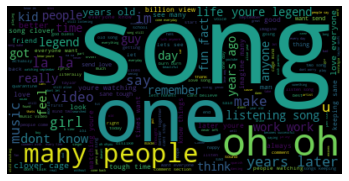

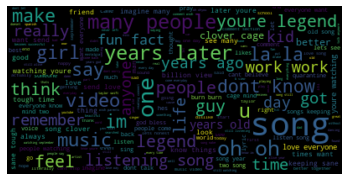

In [12]:
from wordcloud import WordCloud

wordcloud = WordCloud().generate(all_comments)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")

wordcloud = WordCloud(max_font_size=40).generate(all_comments)
plt.figure()
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

In [13]:
from nltk.probability import FreqDist

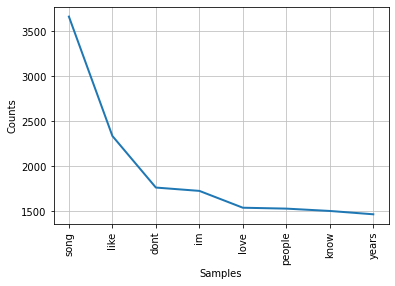

In [14]:
fdist = FreqDist(all_comments.split(' '))
fdist.plot(8,cumulative=False)

In [15]:
most_common = [item[0] for item in fdist.most_common(8)]
most_common

['song', 'like', 'dont', 'im', 'love', 'people', 'know', 'years']

In [16]:
df.shape

(13325, 7)

In [17]:
def clear_most_common_word(x):
    x = x.split(' ')
    return ' '.join([word for word in x if not word in most_common])

In [18]:
df['Comment'] = df['Comment'].apply(clear_most_common_word)

In [19]:
df.head()

,Video Name,Channel Name,Comment Id,User Name,Comment,Date,Likes
0,"Shawn Mendes, Camila Cabello - Señorita",ShawnMendesVEVO,UgwpZ5rb48Q5UJGuJ9F4AaABAg,Pro Gamer,worry one listening masterpiece,2020-09-06T16:37:11Z,80
1,David Guetta - Hey Mama (Official Video) ft Ni...,David Guetta,UgwRwhiW7U-Rmr3xBkR4AaABAg,Immortal Dragon,cook cleanmy mom screaming sibling nextyes coo...,2020-09-09T04:11:52Z,0
2,Naughty Boy - La la la ft. Sam Smith (Official...,NaughtyBoyVEVO,Ugx-4R-oPbL-Toadywt4AaABAg,2listen,covering ears kidwhen words mean nothing go la...,2020-09-06T09:50:44Z,1
3,Jennifer Lopez - On The Floor ft. Pitbull,JenniferLopezVEVO,UgwiejUCtaSJZEtzxrR4AaABAg,"100,000 subs with no video challenge",corona beertrump reality showkaren namefortnig...,2020-08-25T06:30:14Z,579
4,Luis Fonsi - Despacito ft. Daddy Yankee,LuisFonsiVEVO,UgwV0tapZzaFxdYm1z14AaABAg,GAMIT yuvraj,liked comment officially b views,2020-08-10T20:00:43Z,98280


In [20]:
(df.shape[0], df[df['Likes'] < 1000].shape[0])

(13325, 10816)

<AxesSubplot:>

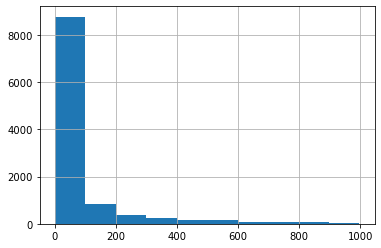

In [21]:
df[df['Likes'] < 1000]['Likes'].hist()

In [22]:
df = df[df['Likes'] < 1000]
df = df[df['Likes'] > 0]
df.reset_index(drop=True, inplace=True)

In [23]:
# df['Likes'].apply(log).hist()

In [24]:
# df['Likes'] = df['Likes'].apply(log)

проверим на выбросы

In [25]:
target = df['Likes']
mean, std = target.mean(), target.std()
outliers = (abs(target - mean) > 3 * std)
outliers = target[outliers] 

drop_emissions_df = df.drop(outliers.index) 

In [26]:
df.shape[0] - drop_emissions_df.shape[0]

318

In [27]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [28]:
tfidf = TfidfVectorizer()
matrix = tfidf.fit_transform(df['Comment'])

In [29]:
reg_df = pd.DataFrame(matrix.toarray())
reg_df.shape

(9683, 16225)

In [30]:
from sklearn.preprocessing import LabelEncoder

In [31]:
labelencoder = LabelEncoder()

In [32]:
reg_df['channel'] = labelencoder.fit_transform(df['Channel Name'])
reg_df['channel'].head()

0     92
1     73
2     51
3    109
4     95
Name: channel, dtype: int64

In [33]:
reg_df['username'] = labelencoder.fit_transform(df['User Name'])
reg_df['username'].head()

0    4500
1     101
2      42
3    5969
4    5783
Name: username, dtype: int64

In [34]:
from sklearn.preprocessing import Normalizer

In [35]:
norm = Normalizer()

In [36]:
norm_reg_df = norm.fit_transform(reg_df)

<AxesSubplot:>

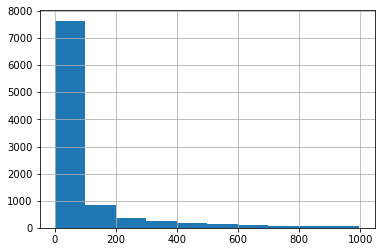

In [37]:
df['Likes'].hist()

# Regression

In [38]:
from sklearn.model_selection import train_test_split

In [39]:
X = norm_reg_df
y = df['Likes']

In [40]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

In [41]:
! pip install catboost

In [42]:
from catboost import CatBoostRegressor

In [43]:
catboost = CatBoostRegressor(iterations=1000,
                             learning_rate=0.03,
                             depth=8)

In [44]:
model_cat = catboost.fit(X_train, y_train)

0:	learn: 160.4769520	total: 452ms	remaining: 7m 31s
1:	learn: 160.4162947	total: 696ms	remaining: 5m 47s
2:	learn: 160.3911916	total: 900ms	remaining: 4m 59s
3:	learn: 160.3626572	total: 1.09s	remaining: 4m 31s
4:	learn: 160.3331798	total: 1.28s	remaining: 4m 15s
5:	learn: 160.2970978	total: 1.48s	remaining: 4m 4s
6:	learn: 160.2330378	total: 1.67s	remaining: 3m 57s
7:	learn: 160.1993426	total: 1.87s	remaining: 3m 51s
8:	learn: 160.1532703	total: 2.06s	remaining: 3m 47s
9:	learn: 160.0828497	total: 2.27s	remaining: 3m 44s
10:	learn: 160.0325254	total: 2.46s	remaining: 3m 41s
11:	learn: 159.9789238	total: 2.66s	remaining: 3m 38s
12:	learn: 159.9405642	total: 2.86s	remaining: 3m 37s
13:	learn: 159.9110260	total: 3.06s	remaining: 3m 35s
14:	learn: 159.8777295	total: 3.26s	remaining: 3m 34s
15:	learn: 159.8482618	total: 3.46s	remaining: 3m 33s
16:	learn: 159.8272210	total: 3.67s	remaining: 3m 32s
17:	learn: 159.7792457	total: 3.87s	remaining: 3m 31s
18:	learn: 159.7218487	total: 4.07s	rem

In [45]:
test_predict = model_cat.predict(X_test)
test_predict

array([75.81991886, 66.28880459, 74.14672607, ..., 71.41874974,
       66.22249463, 73.52383581])

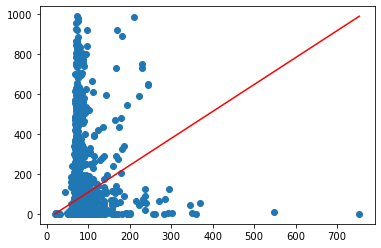

In [46]:
pred = test_predict
ans = y_test
plt.scatter(test_predict, y_test)
plt.plot([test_predict.min(), test_predict.max()], [y_test.min(), y_test.max()], c='r')

In [47]:
# from sklearn.model_selection import cross_val_score
# result_crossval = cross_val_score(catboost, X, y)
# print(result_crossval)

In [48]:
from sklearn.metrics import mean_squared_error, r2_score

In [49]:
mean_squared_error(y_test, test_predict)

30060.89733195347

In [50]:
r2_score(y_test, test_predict)

-0.007472220901222126